In [ ]:
from IPython.display import clear_output as clear
from ipywidgets import interactive
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as img
from matplotlib.offsetbox import  AnnotationBbox, OffsetImage


def Tanque():
    
    def GraficoInteractivoTanque(fluido, radio, masa, posx, posy):
        
        radio= radio/100
        posy = -posy

        
        listaFluidos = ['skyblue', 'olive', 'white', 'goldenrod', 'gray']
        colorFluido = listaFluidos[int(fluido)]
        fig, ax = plt.subplots(dpi=120,figsize=(7,7))
        
        # Fluido
        ax.add_patch(
            patches.Rectangle((0, 0), 3.5, 3.5, facecolor = colorFluido ,fill=True) )
        
        # Tanque
        ax.add_patch(
            patches.Rectangle((0, 0), 3.5, 4,
                edgecolor = 'black',
                fill=False) )
        
        #Bola
        draw_circle = plt.Circle((posx+0.5, 3.5-posy), radio,facecolor = 'red')
        ax.add_artist(draw_circle)
        
        #Escala
        ax.plot([3.8,3.8],[0,3.5],color="black")
        ax.plot([3.70,3.9],[0,0],color="black")
        ax.plot([3.60,4],[0.5,0.5],color="black")
        ax.text(4.025, 0.45, str(3)+" cm")
        ax.plot([3.70,3.9],[1,1],color="black")
        ax.plot([3.60,4],[1.5,1.5],color="black")
        ax.text(4.025, 1.45, str(2)+" cm")
        ax.plot([3.70,3.9],[2,2],color="black")
        ax.plot([3.60,4],[2.5,2.5],color="black")
        ax.text(4.025, 2.45, str(1)+" cm")
        ax.plot([3.70,3.9],[3,3],color="black")
        ax.plot([3.60,4],[3.5,3.5],color="black")
        ax.text(4.025, 3.45, str(0)+" cm")
        
        
        
        
        ax.set_xlim([-0.25, 4])
        ax.set_ylim([-0.25, 4])
        ax.axis ("off")
        
        listaDensidades =[1000, 920, 1.29, 680, 13600]
        rho=listaDensidades[fluido]
        
        pMano = rho*9.81*(posy)
        pAbs = pMano + 101325
         
        
        #Resultado Presión manométrica
        ax.text(0, 4.4, "P. Manométrica=" + str(round (pMano,1)) + " Pa")
        ax.text(0, 4.2, "P. Absoluta=" + str(round (pAbs,1)) + " Pa")
        
        ax.text(1.5, 4.2, "Densidad del Fluido=" + str(rho) + " kg/m$^3$")
        
        

        plt.show()  
        return
    
    
    líquido = widgets.Dropdown(
    options=[('Agua',0), ('Aceite',1), ("Aire 20 °C",2), ("Gasolina",3), ("Mercurio", 4)],
    value=0,
    description='Fluido:',
    disabled=False,
    )

    
    radioEtiqueta = widgets.Label (value="Radio Bola $(cm)$:")
    radioSlider = widgets.FloatSlider(min=1, max=50, step=1, value=50)
    cajaRadio = widgets.HBox([radioEtiqueta, radioSlider])

    masaEtiqueta = widgets.Label (value="Masa de la bola $(kg)$:")
    masaSlider = widgets.FloatSlider(min=0.1, max=2, step=0.1, value=2)
    cajaMasa = widgets.HBox([masaEtiqueta, masaSlider])
    
    cajaBola =widgets.HBox([cajaRadio, cajaMasa])
    
    horizontalEtiqueta = widgets.Label (value="Posición Horizontal $(cm)$:")
    horizontalSlider = widgets.FloatSlider(min=0, max=2.5, step=0.1, value=2)
    cajaHorizontal = widgets.HBox([horizontalEtiqueta, horizontalSlider])

    verticalEtiqueta = widgets.Label (value="Posición Vertical $(cm)$:")
    verticalSlider = widgets.FloatSlider(min=-3, max=-0.5, step=0.1, value=2, orientation='vertical')
    cajaVertical = widgets.HBox([verticalEtiqueta, verticalSlider])
    
    cajaPosición =widgets.HBox([cajaHorizontal, cajaVertical])
    
    accordion = widgets.Accordion(children=[cajaBola, cajaPosición])
    accordion.set_title(0, 'Bola')
    accordion.set_title(1, 'Posición')



    salida = widgets.interactive_output(GraficoInteractivoTanque, {'fluido': líquido,
                                                                    'radio': radioSlider,
                                                                    'masa':masaSlider,
                                                                    'posx':horizontalSlider,
                                                                    'posy':verticalSlider,})
    
    display(líquido, accordion, salida)
    
    
    
    
    

def Carro():
    
    def GraficoInteractivoCarro(posy):
        posy = 100*posy
        
        largoPuerta=1.2
        anchoPuerta=1
        centroPuerta= 90

        fig, ax = plt.subplots(dpi=120,figsize=(5,5))
        
        # Fluido
        ax.add_patch(
            patches.Rectangle((0, 0), 1000, posy, facecolor = "skyblue" ,fill=True) )
        
        #Carro
        im = plt.imread('Auto.png')
        newax = fig.add_axes([0.25,0.0225,0.3,0.3], anchor='C', zorder=1)
        newax.imshow(im)
        newax.axis('off')
        
        
        #Escala
        ax.plot([1100,1100],[centroPuerta,posy],color="black")
        ax.plot([1050,1150],[centroPuerta,centroPuerta],color="black")
        ax.text(1175, centroPuerta-10, str(0)+" m")
        ax.plot([1050,1150],[posy,posy],color="black")
        ax.text(1175, posy-10, str(round((posy-centroPuerta)/100,1))+" m")
 
        
        
        ax.set_xlim([0, 1200])
        ax.set_ylim([0, 700])
        ax.axis ("off")
        
        presión = 1000*9.81*(posy-centroPuerta)/100
        fuerza = presión*anchoPuerta*largoPuerta
        Masa= fuerza/9.81
         
        
        #Resultado Presión manométrica
        ax.text(0, 800, "Presión=" + str(round (presión,1)) + " Pa")
        ax.text(0, 760, "Fuerza=" + str(round (fuerza,1)) + " N")
        ax.text(0, 720, "Lo cual equivale a levantar " + str(round (Masa,1)) + " kg")


        plt.show()  
        return
    

    verticalEtiqueta = widgets.Label (value="Posición Vertical $(m)$:")
    verticalSlider = widgets.FloatSlider(min=1.6, max=7, step=0.1, value=2, orientation='vertical')
    cajaVertical = widgets.HBox([verticalEtiqueta, verticalSlider])


    salida = widgets.interactive_output(GraficoInteractivoCarro, {'posy':verticalSlider,})
    
    display(cajaVertical, salida)
    
    
    
    
    

def Prensa():
    
    def GraficoInteractivoPrensa(radio1, radio2, fuerza):
        
        radio1=radio1/100
        
        radio2=radio2/100

        
        fig, ax = plt.subplots(dpi=120,figsize=(7,7))
        
        # Pistón 1
        ax.add_patch(
            patches.Rectangle((0, 1), radio1 * 2, 0.25, edgecolor = 'black', facecolor = "gray" ,fill=True) )
        ax.add_patch(
            patches.Rectangle((radio1-0.2, 1.25), 0.4, 0.5, edgecolor = 'black', facecolor = "gray" ,fill=True) )
        
        
        # Fluido
        ax.add_patch(
            patches.Rectangle((0, 0), radio1 * 2, 1, edgecolor = 'black', facecolor = "lightyellow" ,fill=True) )
        ax.add_patch(
            patches.Rectangle((6, 0), -radio2 * 2, 1, edgecolor = 'black', facecolor = "lightyellow" ,fill=True) )
  
        
        # Pistón 2
        ax.add_patch(
            patches.Rectangle((6, 1), -radio2 * 2, 0.25, edgecolor = 'black', facecolor = "gray" ,fill=True) )
        ax.add_patch(
            patches.Rectangle((6-radio2-0.2, 1.25), 0.4, 0.5, edgecolor = 'black', facecolor = "gray" ,fill=True) )
        
        
        # Plataforma 
        ax.add_patch(
            patches.Rectangle((6-radio2-2, 1.75), 4, 0.25, edgecolor = 'black', facecolor = "gray" ,fill=True) )
        ax.add_patch(
            patches.Rectangle((radio1-0.7, 1.75), 1.4, 0.25, edgecolor = 'black', facecolor = "gray" ,fill=True) )
        
        
        # Base
        ax.add_patch(
            patches.Rectangle((0, 0), 6, 0.5, edgecolor = 'black', facecolor = "lightyellow",fill=True) )
        ax.add_patch(
            patches.Rectangle((0.01, 0.4), radio1 * 2-0.025, 0.2, facecolor = "lightyellow" ,fill=True) )
        ax.add_patch(
            patches.Rectangle((5.99, 0.4), -radio2 * 2+0.02, 0.2, facecolor = "lightyellow" ,fill=True) )
             
        
        ax.set_xlim([-0.5, 7.8])
        ax.set_ylim([-0.5, 4])
        ax.axis ("off")
        
        fuerzaResultante = fuerza*radio2**2*np.pi/(radio1**2*np.pi)
        
        ax.arrow(radio1, 2.5+fuerza/2000, 0, -0.4-fuerza/2000, 
                 head_width=0.35, head_length=0.1, fc='k', ec='k')  
        ax.text(radio1, 2.6+fuerza/2000, "Fuerza Ejercida=" + str(fuerza) + " N")
        
        
        ax.arrow(6-radio2, 2, 0,0.4+fuerzaResultante/2000, 
                 head_width=0.35, head_length=0.1, fc='k', ec='k') 
        ax.text(6-radio2, 2.6+fuerzaResultante/2000, "Fuerza Resultante=" + str(round(fuerzaResultante,1)) + " N")
        
        ax.text(1.5, -0.25, "Lo cual equivale a levantar " + str(round(fuerzaResultante/9.81,2)) + " kg")

        plt.show()  
        return
    

    
    radio1Etiqueta = widgets.Label (value="Radio Pistón 1 $(cm)$:")
    radio1Slider = widgets.FloatSlider(min=30, max=100, step=1, value=50)
    cajaRadio1 = widgets.HBox([radio1Etiqueta, radio1Slider])

    radio2Etiqueta = widgets.Label (value="Radio Pistón 2 $(cm)$:")
    radio2Slider = widgets.FloatSlider(min=50, max=150, step=1, value=100)
    cajaRadio2 = widgets.HBox([radio2Etiqueta, radio2Slider])
    
    fuerzaEtiqueta = widgets.Label (value="Fuerza Ejercida $(N)$:")
    fuerzaSlider = widgets.FloatSlider(min=10, max=100, step=1, value=50)
    cajaFuerza = widgets.HBox([fuerzaEtiqueta, fuerzaSlider])




    salida = widgets.interactive_output(GraficoInteractivoPrensa, {'radio1': radio1Slider,
                                                                   'radio2': radio2Slider,
                                                                  'fuerza': fuerzaSlider,})
    
    display(cajaRadio1,cajaRadio2,cajaFuerza, salida) 
    

def Boyante():
    
    def ValoresEsferas ():
    
        def Calculo (radio, masa, posy):

            posy= -posy
            radio = radio/100

            fig, ax = plt.subplots(dpi=120,figsize=(7,7))
            
            # Fluido
            ax.add_patch(
                patches.Rectangle((0.25, 0), 1.5, 1, facecolor = 'skyblue' ,fill=True) )

            # Tanque
            ax.add_patch(
                patches.Rectangle((0.25, 0), 1.5, 2,
                    edgecolor = 'black',
                    fill=False) )

            #Bola
            draw_circle = plt.Circle((1, 1-posy), radio,facecolor = 'red')
            ax.add_artist(draw_circle)

            #Escala
            ax.plot([2.1,2.1],[0,1],color="black")
            ax.plot([1.9,2.3],[0,0],color="black")
            ax.plot([2,2.2],[0.25,0.25],color="black")
            ax.text(2.25, 0.475, str(0.5)+" cm")
            ax.plot([1.9,2.3],[0.5,0.5],color="black")
            ax.plot([2,2.2],[0.75,0.75],color="black")
            ax.text(2.25, 0.975, str(0)+" cm")
            ax.plot([1.9,2.3],[1,1],color="black")

            ax.set_xlim([-0.15, 2.25])
            ax.set_ylim([-0.15, 2.25])
            ax.axis ("off")
            
            
            if radio <= posy:
                volumen = 4/3 * np.pi * radio**3
                peso= masa * 9.81
                boyante = volumen *1000*9.81
                ax.text(2.1, 2, "Peso = "+str(round(peso,4))+" N ")
                ax.text(2.1, 1.9, "Fuerza Boyante = "+str(round(boyante,2))+" N")
                if peso < boyante:
                    ax.text(2.1, 1.8, "¡La bola flota!")
                else:
                    ax.text(2.1, 1.8, "¡La bola se hunde!")
                
                
            elif -posy < radio:
                volumen = 4/3*np.pi*radio**2*(radio+posy)/2                
                peso= masa * 9.81
                boyante = volumen *1000*9.81
                ax.text(2.1, 2, "Peso = "+str(round(peso,4))+" N")
                ax.text(2.1, 1.9, "Fuerza Boyante = "+str(round(boyante,2))+" N")
                if peso < boyante:
                    ax.text(2.1, 1.8, "¡La bola flota!")
                else:
                    ax.text(2.1, 1.8, "¡La bola se hunde!")
                
                
            else:
                peso= masa * 9.81
                ax.text(2.1, 2, "Peso = "+str(round(peso,4))+" N")
                ax.text(2.1, 1.9, "Fuerza Boyante = 0 N")                
                    

            plt.show()  
            return
    
        
        radioEtiqueta = widgets.Label (value="Radio Bola $(cm)$:")
        radioSlider = widgets.FloatSlider(min=1, max=50, step=1, value=20)
        cajaRadio = widgets.HBox([radioEtiqueta, radioSlider])

        masaEtiqueta = widgets.Label (value="Masa de la bola $(kg)$:")
        masaSlider = widgets.FloatSlider(min=0.1, max=2, step=0.1, value=7)
        cajaMasa = widgets.HBox([masaEtiqueta, masaSlider])

        cajaBola =widgets.VBox([cajaRadio, cajaMasa])

        verticalEtiqueta = widgets.Label (value="Posición Vertical $(cm)$:")
        verticalSlider = widgets.FloatSlider(min=-0.5, max=0.5, step=0.1, value=2, orientation='vertical')
        cajaVertical = widgets.HBox([verticalEtiqueta, verticalSlider])

        cajaPosición =widgets.HBox([cajaVertical])

        accordion = widgets.Accordion(children=[cajaBola, cajaPosición])
        accordion.set_title(0, 'Bola')
        accordion.set_title(1, 'Posición')

        
        salida = widgets.interactive_output(Calculo, {'radio': radioSlider,
                                                                    'masa':masaSlider,
                                                                    'posy':verticalSlider,})
    
        display(accordion, salida)
        
        
    def ValoresCilindro ():
    
        def Calculo (radio, altura, masa, posy):
            posy= -posy
            radio = radio/100
            altura = altura/100

            fig, ax = plt.subplots(dpi=120,figsize=(7,7))
            
            # Fluido
            ax.add_patch(
                patches.Rectangle((0.25, 0), 1.5, 1, facecolor = 'skyblue' ,fill=True) )

            # Tanque
            ax.add_patch(
                patches.Rectangle((0.25, 0), 1.5, 2,
                    edgecolor = 'black',
                    fill=False) )

            #Cilindro
            ax.add_patch(
                patches.Rectangle((1-radio, -altura/2-posy+1), radio*2, altura,
                    facecolor = 'dimgray',
                    fill=True) )

            #Escala
            ax.plot([2.1,2.1],[0,1],color="black")
            ax.plot([1.9,2.3],[0,0],color="black")
            ax.plot([2,2.2],[0.25,0.25],color="black")
            ax.text(2.25, 0.475, str(0.5)+" cm")
            ax.plot([1.9,2.3],[0.5,0.5],color="black")
            ax.plot([2,2.2],[0.75,0.75],color="black")
            ax.text(2.25, 0.975, str(0)+" cm")
            ax.plot([1.9,2.3],[1,1],color="black")

            ax.set_xlim([-0.15, 2.25])
            ax.set_ylim([-0.15, 2.25])
            ax.axis ("off")
            
            if altura/2 <= posy:
                volumen = np.pi * radio**2 * altura
                peso= masa * 9.81
                boyante = volumen *1000*9.81
                ax.text(2.1, 2, "Peso = "+str(round(peso,4))+" N ")
                ax.text(2.1, 1.9, "Fuerza Boyante = "+str(round(boyante,2))+" N")
                if peso < boyante:
                    ax.text(2.1, 1.8, "¡El cilindro flota!")
                else:
                    ax.text(2.1, 1.8, "¡El cilindro se hunde!")
                
                
            elif -posy < altura/2:
                volumen = np.pi * radio**2 * (altura/2 + posy)
                peso= masa * 9.81
                boyante = volumen *1000*9.81
                ax.text(2.1, 2, "Peso = "+str(round(peso,4))+" N")
                ax.text(2.1, 1.9, "Fuerza Boyante = "+str(round(boyante,2))+" N")
                if peso < boyante:
                    ax.text(2.1, 1.8, "¡El cilindro flota!")
                else:
                    ax.text(2.1, 1.8, "¡El cilindro se hunde!")
                
                
            else:
                peso= masa * 9.81
                ax.text(2.1, 2, "Peso = "+str(round(peso,4))+" N")
                ax.text(2.1, 1.9, "Fuerza Boyante = 0 N")
                
                
            plt.show()  
            return                
                

        radioEtiqueta = widgets.Label (value="Radio Cilindro $(cm)$:")
        radioSlider = widgets.FloatSlider(min=1, max=50, step=1, value=20)
        cajaRadio = widgets.HBox([radioEtiqueta, radioSlider])

        alturaEtiqueta = widgets.Label (value="Altura Cilindro $(cm)$:")
        alturaSlider = widgets.FloatSlider(min=1, max=100, step=1, value=40)
        cajaAltura = widgets.HBox([alturaEtiqueta, alturaSlider])
        
        masaEtiqueta = widgets.Label (value="Masa Cilindro $(kg)$:")
        masaSlider = widgets.FloatSlider(min=10, max=50, step=0.1, value=7)
        cajaMasa = widgets.HBox([masaEtiqueta, masaSlider])
        
        cajaCil =widgets.VBox([cajaRadio, cajaAltura, cajaMasa])

        verticalEtiqueta = widgets.Label (value="Posición Vertical $(cm)$:")
        verticalSlider = widgets.FloatSlider(min=-0.5, max=0.5, step=0.1, value=2, orientation='vertical')
        cajaVertical = widgets.HBox([verticalEtiqueta, verticalSlider])

        cajaPosición =widgets.HBox([cajaVertical])

        accordion = widgets.Accordion(children=[cajaCil, cajaPosición])
        accordion.set_title(0, 'Cilindro')
        accordion.set_title(1, 'Posición')
        
        salida2 = widgets.interactive_output(Calculo, {'radio': radioSlider,
                                                      'altura': alturaSlider,
                                                       'masa':masaSlider,
                                                       'posy':verticalSlider,})
        
        display(accordion, salida2) 
        
        
    def ValoresMuñeco ():
    
        def Calculo (masa):
            posy=0.5
            
            volumen = masa / 950
            
            factorProporcion = masa/75
            
            fig, ax = plt.subplots(dpi=120,figsize=(7,7))
            
                       
            # Fluido
            ax.add_patch(
                patches.Rectangle((0.25, 0), 1.5, 1, facecolor = 'skyblue' ,fill=True) )

            # Tanque
            ax.add_patch(
                patches.Rectangle((0.25, 0), 1.5, 2,
                    edgecolor = 'black',
                    fill=False) )
            
            #Muñeco
            im = plt.imread('dummy.png')
            newax = fig.add_axes([0.35,0.175,0.25*factorProporcion,0.25*factorProporcion], anchor='C', zorder=1)
            newax.imshow(im)
            newax.axis('off')
                    
                    
            #Escala
            ax.plot([2.1,2.1],[0,1],color="black")
            ax.plot([1.9,2.3],[0,0],color="black")
            ax.plot([2,2.2],[0.25,0.25],color="black")
            ax.text(2.25, 0.475, str(1)+" m")
            ax.plot([1.9,2.3],[0.5,0.5],color="black")
            ax.plot([2,2.2],[0.75,0.75],color="black")
            ax.text(2.25, 0.975, str(0)+" m")
            ax.plot([1.9,2.3],[1,1],color="black")

            ax.set_xlim([-0.15, 2.25])
            ax.set_ylim([-0.15, 2.25])
            ax.axis ("off")
            
            peso= masa * 9.81
            boyante = volumen *1000*9.81
            ax.text(2.1, 2, "Peso = "+str(round(peso,4))+" N ")
            ax.text(2.1, 1.9, "Fuerza Boyante = "+str(round(boyante,2))+" N")
            
            ax.text(2.1, 1.8, "¡El muñeco flota!")
            

       
        masaEtiqueta = widgets.Label (value="Masa Muñeco $(kg)$:")
        masaSlider = widgets.FloatSlider(min=50, max=90, step=1, value=65)
        cajaMasa = widgets.HBox([masaEtiqueta, masaSlider])
                
        cajaMuñ =widgets.VBox([cajaMasa])

        accordion = widgets.Accordion(children=[cajaMuñ])
        accordion.set_title(0, 'Muñeco')
        
        salida2 = widgets.interactive_output(Calculo, {'masa': masaSlider,})
       
        display(accordion, salida2)
        
    
    def GraficoInteractivoBoyante(figura):
        
        if figura == 0:
            ValoresEsferas ()
            
        elif figura == 1:
            ValoresCilindro ()
            
        else:
            ValoresMuñeco ()
        
        return  
        

    forma = widgets.Dropdown(
    options=[('Esfera',0), ('Cilindro',1), ("Muñeco",2)],
    value=0,
    description='Objeto:',
    disabled=False,
    )
    

    salida1 = widgets.interactive_output(GraficoInteractivoBoyante, {'figura': forma,})
    
    display(forma, salida1) 
    
  

def Continuidad():
    
    arregloVelocidad = []
    
    arregloTiempo = []
    
    print("Se recomienda limpiar las gráficas antes de generar una nueva simulación")
    
    def GraficoInteractivoContinuidad(radio1, radio2, radio3, v_0, tiempo):
        
        t = tiempo/1000
        
        area1= radio1**2*np.pi
        
        area2= radio2**2*np.pi
        
        area3= radio3**2*np.pi
        
        
        fig, (ax1, ax2) = plt.subplots(1, 2, dpi=120,figsize=(14,7), sharey= False)
        
        # Tubo 1
        ax1.add_patch(
            patches.Rectangle((0, -radio1), 3.75, radio1*2, facecolor = 'silver', fill=True) )        
         
        
        # Tubo 2
        ax1.add_patch(
            patches.Rectangle((3.75, -radio2), 4.5, radio2*2, facecolor = 'silver', fill=True) )   
                
        
        # Tubo 3
        ax1.add_patch(
            patches.Rectangle((8.25, -radio3), 4, radio3*2, facecolor = 'silver', fill=True) )
        
        
        #Arreglos en los bordes de los tubos              
        x1= [0, 3.75, 3.75, 8.25, 8.25, 12]
        y1=[radio1, radio1, radio2, radio2, radio3, radio3]
        ax1.plot(x1,y1,'k-', linewidth = 5)
        
        x2= [0, 3.75, 3.75, 8.25, 8.25, 12]
        y2=[-radio1, -radio1, -radio2, -radio2, -radio3, -radio3]
        ax1.plot(x2,y2,'k-', linewidth = 5)
                
        
        if t <= 3.75:
            v = v_0
            
            arregloVelocidad.append(v)
            
            arregloTiempo.append(t)
            
            # Agua 
            ax1.add_patch(
                patches.Rectangle((0, -radio1), t, radio1*2, facecolor = 'skyblue', fill=True) )
          
        
        elif 3.75<t<=8.25:
            v= area1*v_0/area2
            
            arregloVelocidad.append(v)
            
            arregloTiempo.append(t)
            
            # Agua 
            ax1.add_patch(
                patches.Rectangle((0, -radio1), 3.75, radio1*2, facecolor = 'skyblue', fill=True) )
            ax1.add_patch(
                patches.Rectangle((3.75, -radio2), t-3.75, radio2*2, facecolor = 'skyblue', fill=True) )
            
        
        else:
            v= area1*v_0/area3
            
            arregloVelocidad.append(v)
            
            arregloTiempo.append(t)
            
            # Agua 
            ax1.add_patch(
                patches.Rectangle((0, -radio1), 3.75, radio1*2, facecolor = 'skyblue', fill=True) )
            ax1.add_patch(
                patches.Rectangle((3.75, -radio2), 4.5, radio2*2, facecolor = 'skyblue', fill=True) )
            ax1.add_patch(
                patches.Rectangle((8.25, -radio3), t-8.25, radio3*2, facecolor = 'skyblue', fill=True) )      
                
        
        ax1.set_xlim([0.1, 11.98])
        ax1.set_ylim([-17, 17])
        ax1.axis ("off")
        
        
        vGrafica = area1*v_0/area3
        
        ax2.set_xlim([0, 12])
        ax2.set_ylim([0, vGrafica+5])
        ax2.plot(arregloTiempo, arregloVelocidad)
        ax2.set_title('Velocidad vs Tiempo')
        ax2.set_xlabel('Tiempo $s$')
        ax2.set_ylabel('Velocidad $m/s$')
        

        plt.show()  
        return
    

    
    radio1Etiqueta = widgets.Label (value="Radio Tubo 1 $(cm)$:")
    radio1Slider = widgets.FloatSlider(min=3, max=7, step=0.5, value=7)
    cajaRadio1 = widgets.HBox([radio1Etiqueta, radio1Slider])

    radio2Etiqueta = widgets.Label (value="Radio Tubo 2 $(cm)$:")
    radio2Slider = widgets.FloatSlider(min=3, max=7, step=0.5, value=5)
    cajaRadio2 = widgets.HBox([radio2Etiqueta, radio2Slider])
    
    radio3Etiqueta = widgets.Label (value="Radio Tubo 3 $(cm)$:")
    radio3Slider = widgets.FloatSlider(min=3, max=7, step=0.5, value=6)
    cajaRadio3 = widgets.HBox([radio3Etiqueta, radio3Slider])
    
    velocidadEtiqueta = widgets.Label (value="Velocidad Inicial $(m/s)$:")
    velocidadSlider = widgets.FloatSlider(min=1, max=10, step=0.1, value=5)
    cajaVelocidad = widgets.HBox([velocidadEtiqueta, velocidadSlider])
    
    play = widgets.Play(value=0, min=0, max=12000, step=50, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(ms)$:")
    tieSlider = widgets.FloatSlider(min=0, max=12000,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])




    salida = widgets.interactive_output(GraficoInteractivoContinuidad, {'radio1': radio1Slider,
                                                                        'radio2': radio2Slider,
                                                                        'radio3': radio3Slider,
                                                                        'v_0': velocidadSlider,
                                                                        'tiempo':tieSlider,})
    
    button = widgets.Button(description="Limpiar")
    output = widgets.Output()
    
    display(button, cajaRadio1,cajaRadio2,cajaRadio3,cajaVelocidad, cajaTiempo, play, salida) 
    
    
    def on_button_clicked(b):
            clear()
            Continuidad ()



    button.on_click(on_button_clicked)
    
    
    
def Bernoulli():
    
    arregloVelocidad = []    
    arregloAltura = []    
    arregloPresion = []
    
    arregloTiempo = []
    
    print("Se recomienda limpiar las gráficas antes de generar una nueva simulación")
    
    def GraficoInteractivoBernoulli(radio1, radio2, radio3, v_0, altura2, presion_0, tiempo):
        
        altura1 = 1
        
        t = tiempo/1000
        
        area1= radio1**2*np.pi
        
        area2= radio2**2*np.pi
        
        area3= radio3**2*np.pi
        
        
        fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, dpi=120,figsize=(14,14), sharey= False)
        
        # Tubo 1
        ax1.add_patch(
            patches.Rectangle((0, altura1-radio1), 4-radio2, radio1*2, facecolor = 'skyblue', fill=True) )        
         
        
        # Tubo 2
        ax1.add_patch(
            patches.Rectangle((4-radio2, altura1-radio1), radio2*2, altura2+radio3-altura1+radio1,
                              facecolor = 'skyblue', fill=True) )   
                
        
        # Tubo 3
        ax1.add_patch(
            patches.Rectangle((4+radio2, altura2-radio3),4, radio3*2, facecolor = 'skyblue', fill=True) )
    
        
        #Arreglos en los bordes de los tubos
        
        x1= [0, 4-radio2, 4-radio2, 8+radio2]
        y1=[altura1+radio1, altura1+radio1, altura2+radio3, altura2+radio3]
        ax1.plot(x1,y1,'k-', linewidth = 5)

        x2= [0, 4+radio2, 4+radio2, 8+radio2]
        y2=[altura1-radio1, altura1-radio1, altura2-radio3, altura2-radio3]
        ax1.plot(x2,y2,'k-', linewidth = 5)

                
        #Partícula
        if t <= 4:
            v=v_0
            presion = presion_0
            altura = 1
            
            arregloVelocidad.append(v)
            arregloPresion.append(presion)
            arregloAltura.append(altura)
            
            arregloTiempo.append(t)
            
            ax1.plot(t, 1, marker = 'o', markerfacecolor = 'cyan')
            
          
        
        elif 4<t<=4+altura2-altura1:
            v= area1*v_0/area2
            altura = t-3
            presion = presion_0 + (1000*9.81*(1-altura) + 1/2*1000*(v_0**2-v**2))/1000
            
            
            arregloVelocidad.append(v)
            arregloPresion.append(presion)
            arregloAltura.append(altura)
            
            arregloTiempo.append(t)
            
            ax1.plot(4, t-3, marker = 'o', markerfacecolor = 'cyan')
            
        
        else:
            if 4+t-(4+altura2-altura1-radio1) > 8+radio2:
                t= 17
                
            else:
                v= area1*v_0/area3
                altura = altura2
                presion = presion_0 + (1000*9.81*(1-altura) + 1/2*1000*(v_0**2-v**2))/1000


                arregloVelocidad.append(v)
                arregloPresion.append(presion)
                arregloAltura.append(altura)

                arregloTiempo.append(t)

                ax1.plot(4+t-(4+altura2-altura1), altura2, marker = 'o', markerfacecolor = 'cyan')               
                
        
        ax1.set_xlim([-1.5, 12.5])
        ax1.set_ylim([-1.5, 12.5])
        #ax1.axis ("off")
        
        #Definicion de límites 
        listaArea= [area2, area3]
        v2=area1*v_0/area2
        v3=area1*v_0/area3        
        presion2 = presion_0 + (1000*9.81*(1-altura2) + 1/2*1000*(v_0**2-v2**2))/1000
        presion3 = presion_0 + (1000*9.81*(1-altura2) + 1/2*1000*(v_0**2-v3**2))/1000
        listaPresion =[presion2,presion3]
        
        vGrafica = area1*v_0/np.min(listaArea)
        pGrafica = np.min(listaPresion)
        
        ax2.set_xlim([0, 17])
        ax2.set_ylim([0, vGrafica+5])
        ax2.plot(arregloTiempo, arregloVelocidad)
        ax2.set_title('Velocidad vs Tiempo')
        ax2.set_xlabel('Tiempo $s$')
        ax2.set_ylabel('Velocidad $m/s$')
        
        ax3.set_xlim([0, 17])
        ax3.set_ylim([pGrafica-50, 550])
        ax3.plot(arregloTiempo, arregloPresion)
        ax3.set_title('Presión vs Tiempo')
        ax3.set_xlabel('Tiempo $s$')
        ax3.set_ylabel('Presión $kPa$')
        
        ax4.set_xlim([0, 17])
        ax4.set_ylim([0, altura2+5])
        ax4.plot(arregloTiempo, arregloAltura)
        ax4.set_title('Altura vs Tiempo')
        ax4.set_xlabel('Tiempo $s$')
        ax4.set_ylabel('Altura $m$')
        

        plt.show()  
        return
    

    
    radio1Etiqueta = widgets.Label (value="Radio Tubería 1 $(m)$:")
    radio1Slider = widgets.FloatSlider(min=1, max=2, step=0.05, value=1.5)
    cajaRadio1 = widgets.HBox([radio1Etiqueta, radio1Slider])

    radio2Etiqueta = widgets.Label (value="Radio Tubería 2 $(m)$:")
    radio2Slider = widgets.FloatSlider(min=1, max=2, step=0.05, value=1.25)
    cajaRadio2 = widgets.HBox([radio2Etiqueta, radio2Slider])
    
    radio3Etiqueta = widgets.Label (value="Radio Tubería 3 $(m)$:")
    radio3Slider = widgets.FloatSlider(min=1, max=2, step=0.05, value=1.75)
    cajaRadio3 = widgets.HBox([radio3Etiqueta, radio3Slider])
    
    velocidadEtiqueta = widgets.Label (value="Velocidad Inicial $(m/s)$:")
    velocidadSlider = widgets.FloatSlider(min=1, max=5, step=0.1, value=3)
    cajaVelocidad = widgets.HBox([velocidadEtiqueta, velocidadSlider])
    
    altura2Etiqueta = widgets.Label (value="Altura Tubería 3 $(m)$:")
    altura2Slider = widgets.FloatSlider(min=1, max=10, step=0.5, value=5)
    cajaAltura2 = widgets.HBox([altura2Etiqueta, altura2Slider])
    
    presionEtiqueta = widgets.Label (value="Presión Inicial $(kPa)$:")
    presionSlider = widgets.FloatSlider(min=400, max=500, step=10, value=400)
    cajaPresion = widgets.HBox([presionEtiqueta, presionSlider])
    
    play = widgets.Play(value=0, min=0, max=17000, step=50, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(ms)$:")
    tieSlider = widgets.FloatSlider(min=0, max=17000,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])




    salida = widgets.interactive_output(GraficoInteractivoBernoulli, {'radio1': radio1Slider,
                                                                      'radio2': radio2Slider,
                                                                      'radio3': radio3Slider,
                                                                      'v_0': velocidadSlider,
                                                                      'altura2': altura2Slider,
                                                                      'presion_0': presionSlider,
                                                                      'tiempo':tieSlider,})
    
    button = widgets.Button(description="Limpiar")
    output = widgets.Output()
    
    display(button, cajaRadio1,cajaRadio2,cajaRadio3,cajaVelocidad,
            cajaAltura2,cajaPresion,cajaTiempo, play, salida) 
    
    
    def on_button_clicked(b):
            clear()
            Bernoulli ()



    button.on_click(on_button_clicked)
    
    




# Presión

La presión es una magnitud en la cual se relaciona la fuerza con la superficie sobre la que actúa dicha fuerza. Al analizar una superficie plana y una fuerza normal uniforme, se define a la presión como.

$$
p=\frac{F}{A}
$$

Un ejemplo claro de esto es cuando se clava sobre una madera, como se muestra en la siguiente figura.

![SegmentLocal](martillo.jpg)

Al tratar con fluidos, como lo puede ser el agua o el aire, se puede observar una relación lineal entre la altura y la presión. Donde:

$$
p=\rho g h
$$

Al estar en grandes alturas, como en una montaña, se puede sentir esa relación de la presión con la altura por medio de los oídos. Esto debibo a la disminución de la presión en montañas muy altas.

![SegmentLocal](montaña.jpg)

Esta misma relación se puede obtener en cualquier fluido, dependiendo de su densidad, como se muestra en la siguiente simulación.

In [ ]:
Tanque ()

Si se analiza un automovil que está en el fondo de un lago, en donde su puerta mide 1,2 m x 1,0 m y dicha puerta está a 0,3 m de altura con respecto al fondo del lago se obtiene la siguiente simulación en la que se dan los resultados de presión y fuerza sobre la puerta.

In [ ]:
Carro ()

Se puede observar que para cualquier caso si un automovil está en sumegido completamente en agua, es imposible abrir la puerta.

# Principio de Pascal

El principio de Pascal indica que para un fluido incompresible que se encuentra dentro de un repicipiente con paredes indeformables, se transmite la presión con igual intensidad en todas las direcciones y en todos los puntos. Por lo cual dichas presiónes pueden relacionarse por medio de su fuerza y área respectivas. Como se muestra en la siguiente figura.

![SegmentLocal](Prensa.gif)

Donde:
$$
\frac{F_1}{A_1}=\frac{F_2}{A_2}
$$

Dicha relación es muy utilizada en las prensas hidráulicas como se puede observar en la siguiente simulación.

In [ ]:
Prensa ()

# Flotación

La flotación es el fenómeno en donde, si un cuerpo es menos denso que el fluido en el cual está sumergido, este flota. Como lo puede ser el helio en el aire o el cuerpo humano normalmente en el agua. Otro ejemplo claro es el de los globos aerostáticos, los cuales al calentar el aire hacen que este sea menos denso y por consecuencia que el globo empiece a ascender.

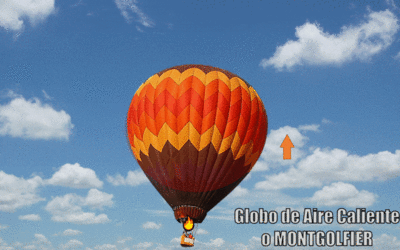

Estos globos se basan en el principio de Arquímedes el cual dice que "Si un cuerpo está parcial o totalmente sumergido en un fluido, este ejerce una fuerza hacia arriba sobre el cuerpo igual al peso del fluido desplazado por el cuerpo."

Con base a dicho principio se define la fuerza boyante, la cual se expresa como:

$$
B=\rho V g
$$

Donde:

$\rho$: La densidad del fluido

$V$: El volumen del objet sumergido

$g$: La gravedad

Si se considera un sistema en donde solo actúan la fuerza boyante y el peso del objeto sumergido, aplicando la segunda ley de Newton, se puede obtener que:

$$
\rho V g-mg=ma
$$

Donde si el peso es mayor, significa que el objeto se hunde y en caso contrario el objeto flotaría. Esto se puede apreciar en la siguiente simulación.

In [ ]:
Boyante ()

# Ecuación de continuidad

Si se considera que la masa de un fluido en movimiento no varía al fluir, se obtiene la ecuación de continuidad. Donde si se definen dos secciones transversales estacionarias con áreas $A_1$ y $A_2$ y su velocidades son $v_1$ y $v_2$ respectivamente. Se puede observar que, durante intervalo de tiempo infinitesimal, en la primera sección el fluido se va a mover una distancia igual a $v_1dt$, por lo que se obtendría un volumen igual a $dV_2=A_1v_1dt$. Mientras que en la segunda sección se tendría un caso similar donde $dV_2=A_2v_2dt$ es el volumen del fluido que saldría por el tubo.

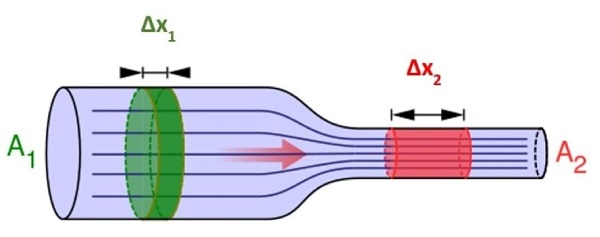

Retomando el hecho que la masa del fluido no varía, se puede definir que $dm_1=dm_2$, donde $dm=\rho Avdt$. Obteniendo así que:

$$
\rho A_1v_1dt=\rho A_2v_2dt
$$
$$
\Longrightarrow A_1v_1=A_2v_2
$$

La cual es la ecuación de continuidad para un fluido incompresible. Se puede observar que en el caso de aumentar el área transversal de la primera sección necesariamente la velocidad en la segunda sección se va a ver incrementada y viceversa. Esto se puede ver de mejor manera en la siguiente simulación.

In [ ]:
Continuidad ()

# Ecuación de Bernoulli

Con base a la ecuación de continuidad se sabe que la velocidad de un fluido puede variar a lo largo de su recorrido, dependiendo del área transversal del tubo por el que este pasa. Además se sabe que la presión puede variar dependiendo de la altura en la que se encuentre el fluido. 

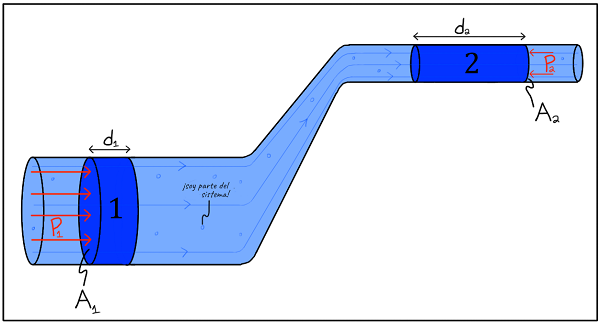

Con dichas bases y el teorema del trabajo y la energía, se puede deducir la ecuación de Bernoulli, la cual se define como:

$$
p_1+\rho gy_1+\frac{1}{2}\rho v_1^2=p_2+\rho gy_2+\frac{1}{2}\rho v_2^2
$$

Lo cual significa que para cualquier punto en el tubo de flujo **estable** en un fluido **incompresible** y **sin viscosidad**  se debe cumplir que:

$$
p+\rho gy+\frac{1}{2}\rho v^2=constante
$$

Dicha propiedad, se puede observar en la siguiente simulación.

In [ ]:
Bernoulli()